In [ ]:
### till now case-study is of 1 hr 30 mins !
    ### in latest release it will be of 1 hr 45 mins ! 
        ( & 10th prblm statement added + some new code added + new explaination added + new plots added + Conclusions Added )

In [160]:

'''

Extracted from chatgpt :




📊 A. Descriptive & Summary Analysis
Total restaurants per location
Top cuisines overall and per location
Most common restaurant types (rest_type)
How many allow online orders?
How many support table booking?
Average cost for two per area / city
Ratings distribution
Votes vs Ratings correlation



🗺️ B. Geospatial Analysis
Using location and lat/lon you generate:
Heatmap of restaurant density
Best-rated zones on a city map
Clustering of types (fine-dining vs cafes)
Marker-based popups with details (e.g., Yelahanka: 6 restaurants)



🍽️ C. Culinary Preferences
Most liked dishes (from dish_liked)
Cuisine popularity vs rating
Type of restaurant vs cost vs rating
Location-wise most common cuisine



📉 D. Cost vs Rating Analysis
Is expensive food better rated?
Scatter plots: rating vs cost, cost vs votes
Boxplot of rating by cost brackets



🌟 E. Top Restaurant Finder
Top 10 restaurants by rating
Top by votes or reviews
Most frequently mentioned in reviews (reviews_list)



📲 F. Platform Readiness
How many restaurants allow online orders?
Do online-ordering restaurants get better ratings?
Do table-booking restaurants have higher cost?



🧠 G. Sentiment Analysis (Advanced)
If you process reviews_list:

Extract text and run basic sentiment analysis
Show location-wise customer satisfaction
Word cloud of most common terms in good/bad reviews



🧮 H. Clustering & Recommendation (ML)
Cluster restaurants by price, rating, cuisine
Recommend top 3 restaurants in a location based on filters
Build a "restaurant explorer" app (Streamlit)



🧾 I. Data Cleaning & Transformation Ideas
Clean cost (approx_cost(for two people)) and rating (rate) columns
Split cuisines and dish_liked into lists
Parse reviews_list into structured format (if in text format)






'''

'\n\nExtracted from chatgpt :\n\n\n\n\n\n\n\n'

## 1.. Lets Read Data For Analysis

In [1]:
### import necessary packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'R:\All_Datasets\Spatial_Analysis\1.. Zomato/zomato.csv')

In [ ]:
'''
windows OS uses backslash "\" in their file path 
whereas in MacOS , file paths use the forward slash / as the separator in their file path — just like Linux and Unix systems.

So just to get rid of this issue , u have concept of raw string(r) just before file path which tells Python
to read file as it is !

'''

In [3]:
type(data) ## ie above "data" belongs to dataframe data-structure

pandas.core.frame.DataFrame

In [4]:
'''

pandas – This is the name of the Python library used for data manipulation and analysis.
core – This is an internal module inside pandas that contains the core functionality.
frame – This is a submodule which contains the DataFrame class.
DataFrame – This is the actual class used to dataframe ( a data structures in pandas)..



'''

'\n\npandas – This is the name of the Python library used for data manipulation and analysis.\ncore – This is an internal module inside pandas that contains the core functionality.\nframe – This is a submodule which contains the DataFrame class.\nDataFrame – This is the actual class used to dataframe ( a data structures in pandas)..\n\n\n\n'

In [5]:
data.head(3) ## getting first 3 rows of data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [6]:
data.columns ## getting all the columns of dataframe

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
data.shape ## getting dimensions of dataframe ..

(51717, 17)

## 2.. Performing data-preprocessing on data ..

In [8]:
data.duplicated().sum() ## 0 duplicated entries

0

In [9]:
data.isnull().sum() ## getting total missing values in every feature of dataframe

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
### So first & foremost  we have to clean the missing values of location feature in order to come up with interesting results..

In [11]:
### As we have few missing values in location feature ,then we can drop that..

data.dropna(subset=['location'] , inplace = True)

In [12]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7754
votes                              0
phone                           1187
location                           0
rest_type                        206
dish_liked                     28057
cuisines                          24
approx_cost(for two people)      325
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [13]:
data.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [14]:
df = data.copy() ## creating copy of "data" into "df" ,so that whatever manipulations we will do , we will do on top of df

In [15]:
### Lets make every place more readible so that u will get more more accurate geographical co-ordinates..
### kindly make sure that u have only 1 white space just to make your location more readable  , 
## So lets remove all extra white-spaces if available in data..

In [16]:
df['location'] = df['location'].str.strip() + ' , Bangalore , Karnataka , India'

### .str is pandas' string accessor' (it means using str ,u can apply all string operations on every value of "location" series)
## strip() will remove all the leading and trailing spaces..

In [17]:
df['location']

0             Banashankari , Bangalore , Karnataka , India
1             Banashankari , Bangalore , Karnataka , India
2             Banashankari , Bangalore , Karnataka , India
3             Banashankari , Bangalore , Karnataka , India
4             Basavanagudi , Bangalore , Karnataka , India
                               ...                        
51712           Whitefield , Bangalore , Karnataka , India
51713           Whitefield , Bangalore , Karnataka , India
51714           Whitefield , Bangalore , Karnataka , India
51715    ITPL Main Road, Whitefield , Bangalore , Karna...
51716    ITPL Main Road, Whitefield , Bangalore , Karna...
Name: location, Length: 51696, dtype: object

In [18]:
df.dtypes ## various data-types

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [19]:
'''

🟨 Categorical Data
Categorical data refers to a data type that can be stored into groups/categories/labels 
Includes data types like : object and bool
example : age group, blood type etc.. 


🔢 Numerical Data
Numerical data refers to the data that is in the form of numbers
Numerical data have : Integer & Float data-type
example : your Bank balance: , no of Bank accounts you have !



Numerical data has two categories: discrete data and continuous data

Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. 
                age of a fly : 8 , 9 day etc..
                
Continuous data : which is continuous in nature 
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !
                  


'''

'\n\n🟨 Categorical Data\nCategorical data refers to a data type that can be stored into groups/categories/labels \nIncludes data types like : object and bool\nexample : age group, blood type etc.. \n\n\n🔢 Numerical Data\nNumerical data refers to the data that is in the form of numbers\nNumerical data have : Integer & Float data-type\nexample : your Bank balance: , no of Bank accounts you have !\n\n\n\nNumerical data has two categories: discrete data and continuous data\n\nDiscrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. \n                age of a fly : 8 , 9 day etc..\n                \nContinuous data : which is continuous in nature \n                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !\n                  \n\n\n'

In [20]:
'''

Variations of int are : ('int64','int32','int16') in numpy library..


Int16 is a 16 bit signed integer , it means it can store both positive & negative values
int16 has has a range of  (2^15 − 1) to -2^15 
int16 has a length of 16 bits (2 bytes) of memory to store data.. ie Int16 uses 16 bits 


Int32 is a 32 bit signed integer , it means it storesboth positive & negative values
int32 has has a range of (2³¹ − 1) to  -2^31
int32 has a length of 32 bits (4 bytes) of memory to store data.. ie Int32 uses 32 bits


Int64 is a 64 bit signed integer , it means it can store both positive & negative values
int64 has has a range of  (2^63 − 1) to -2^63 
int64 has a length of 64 bits (8 bytes) of memory to store data.. ie Int64 uses 64 bits.
             


📌 Key Points:

1 ) Storage Capacity (Range):

int16: Stores smaller numbers
int32: Stores bigger numbers
int64: Stores very large numbers


2 ) Memory Usage:

int16 uses 2 bytes
int32 uses 4 bytes
int64 uses 8 bytes
→ So, int64 takes the most space in memory.


3 ) Speed & Performance:

Smaller types like int16 or int32 are usually faster on most systems.
int64 can be slower because it uses more memory and processing power.


4 ) When to Use What:

Use int16 for small numbers to save memory.
Use int32 for medium-size numbers (common default).
Use int64 if your numbers are very large (like population data, big IDs, etc.).


5 ) Precision Advantage:

int64 can store big whole numbers more accurately than float32, which might lose precision.



'''


"\n\nVariations of int are : ('int64','int32','int16') in numpy library..\n\n\nInt16 is a 16 bit signed integer , it means it can store both positive & negative values\nint16 has has a range of  (2^15 − 1) to -2^15 \nint16 has a length of 16 bits (2 bytes) of memory to store data.. ie Int16 uses 16 bits \n\n\nInt32 is a 32 bit signed integer , it means it storesboth positive & negative values\nint32 has has a range of (2³¹ − 1) to  -2^31\nint32 has a length of 32 bits (4 bytes) of memory to store data.. ie Int32 uses 32 bits\n\n\nInt64 is a 64 bit signed integer , it means it can store both positive & negative values\nint64 has has a range of  (2^63 − 1) to -2^63 \nint64 has a length of 64 bits (8 bytes) of memory to store data.. ie Int64 uses 64 bits.\n             \n\n\n📌 Key Points:\n\n1 ) Storage Capacity (Range):\n\nint16: Stores smaller numbers\nint32: Stores bigger numbers\nint64: Stores very large numbers\n\n\n2 ) Memory Usage:\n\nint16 uses 2 bytes\nint32 uses 4 bytes\nint64 u

## 3.. Extract Latitudes & longitudes from data..

In [ ]:
## now the immediate question is - how to extract lat & lon of location ??

In [ ]:
### so using address or location feature , we can extract what the geographical co-ordinates are !

### so just for simplicity first we will learn how to extract it using 'location' feature ,then 
### in the next session we will learn how to do it using 'address' feature..

#### definition of latitudes & Longitudes :

    Every place on Earth can be located using a unique pair of numbers called coordinates (Lat , Lon) :

    The first number is the latitude
    The second number is the longitude
    
    These coordinates are useful for maps, GPS, navigation and geolocation..
    
    Lets understand what latitudes & longitudes are ( From Globe ) :
    We have a Equator (the line around the middle of the Earth)..
    We have a Prime Meridian (a line running from the North Pole to the South Pole passing through Greenwich, England).
    
    The globe is split into an imaginary 360 sections from both top to bottom (north to south) 
    and 180 sections from side to side (ie east to west). 
    
    The sections running from top to bottom(ie north to south) on a globe are called longitude &
    it measure how far east or west a place is from the Prime Meridian.
    
    The sections running from side to side (ie east to west) on a globe are called latitude &
    it measures how far north or south a place is from the Equator.
    

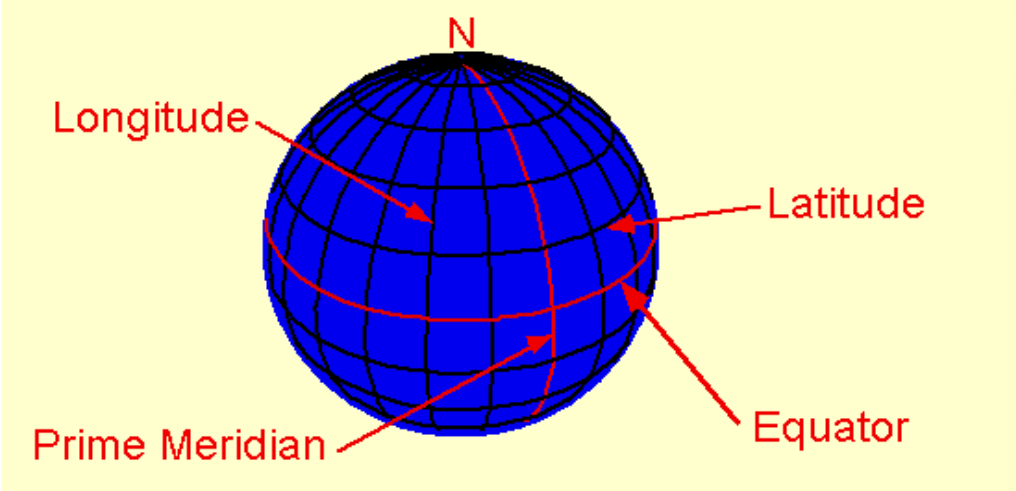

In [21]:
from IPython.display import Image, display

# Replace with your image file name
display(Image(filename=r'R:\3.. Entire_Spatial_Analysis_Projects\1.. Zomato_use_case\2.. Current_Spatial_Zomato_Udemy/Globe.png'))


In [22]:
## first we will learn how to extract Latitudes & longitudes using 'location' feature

In [23]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [24]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [25]:
rest_loc = pd.DataFrame() ## creating dataframe of all the unique locations of Bengalore

In [26]:
rest_loc['Name'] = df['location'].unique()

In [27]:
rest_loc

,Name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , I..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [28]:
# !pip install geopy

In [29]:
from geopy.geocoders import Nominatim

### Nominatim is a tool that uses OpenStreetMap data & it extracts Geographical co-ordinates from address or location

In [30]:
geolocator = Nominatim(user_agent="app" , timeout = None ) ## set timeout=None to get rid of timeout error

In [ ]:
'''
'user_agent' = "app" , ie u are trying to establish connection to the Nominatim server..
🚫 If you don’t set user_agent, Nominatim will reject your requests.


By default, geopy has a timeout (usually 1 second or 5 seconds).

If the API is slow or your network is lagging or u may have slow Internet, it may throw GeocoderTimedOut.
Setting timeout = None means: “Wait untill a response comes.”
 

'''

In [31]:
'''
regarding time.sleep(1) : 
Nominatim (especially the free version have a limit of 1 request per second maximum from an individual IP.
If you exceed this limit, your requests may:

Be blocked temporarily
Get delayed
Or start returning errors (like 429: Too Many Requests)




How to get rid of this issue :
1sy way : Use a paid geocoding API (like Google Maps, Mapbox) 
2nd way : U can add time.sleep(1) between requests:

'''

'\n\nNominatim (especially the free version have a limit of 1 request per second maximum from an individual IP.\nIf you exceed this limit, your requests may:\n\nBe blocked temporarily\nGet delayed\nOr start returning errors (like 429: Too Many Requests)\n\n\n\n\nHow to get rid of this issue :\n1sy way : Use a paid geocoding API (like Google Maps, Mapbox) \n2nd way : U can add time.sleep(1) between requests:\n\n'

In [32]:
import time
lat = [] ## define lat list to store all the latitudes
lon = [] ## define lon list to store all the longitudes

for location in rest_loc['Name']:
    geocoded_location = geolocator.geocode(location)
    time.sleep(1)  # wait 1 second to respect Nominatim's rate limit

    if location:
        lat.append(geocoded_location.latitude)
        lon.append(geocoded_location.longitude)
    else:
        lat.append(np.nan)
        lon.append(np.nan)

        
### you have around 90 entries & since u add time.sleep(1) just to respect Nominatim's rate limit
### So whole code will take around 1.5 - 2 mins to execute it..

In [33]:
print(lat)

[12.9278196, 12.9417261, 12.9467026, 12.9292731, 12.9067683, 12.9274413, 12.9660722, 12.9055682, 12.9096941, 12.9287596, 12.965718, 12.9651215, 12.9060737, 12.9112758, 12.8591407, 12.9089453, 12.9850987, 12.8487599, 12.9116225, 12.9552572, 12.9239942, 12.9489339, 12.9555367, 12.9348429, 12.9408685, 12.9684808, 12.9364846, 13.0394104, 12.9327778, 12.9361208, 12.9963995, 12.9833162, 12.9584696, 12.9732913, 12.9277245, 12.9975851, 13.0227204, 12.9755264, 12.971609, 12.9722287, 12.9749142, 12.9778793, 12.9672634, 12.9855286, 12.9800059, 12.9758014, 12.9884255, 12.9813402, 12.9822423, 12.9921738, 13.031992, 12.9624669, 12.945245, 12.9678074, 13.0219668, 13.0027353, 12.9931876, 13.0148544, 12.9390255, 12.9779079, 12.957998, 12.9730087, 12.9578658, 12.9652094, 12.9876393, 12.9616273, 13.007516, 12.9243692, 12.9282918, 12.9357366, 12.9553487, 13.0005359, 13.0141618, 13.0222347, 13.0422794, 13.037077, 13.0221416, 13.039186, 13.0784743, nan, 12.8744383, 12.9846713, 13.0382184, 12.9176571, 12.995

In [34]:
rest_loc['lat'] = lat
rest_loc['lon'] = lon

In [35]:
rest_loc

,Name,lat,lon
0,"Banashankari , Bangalore , Karnataka , India",12.927820,77.556621
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",12.952903,77.515800
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [36]:
rest_loc.isnull().sum() ## checking missing values in a rest_loc dataframe..

Name    0
lat     2
lon     2
dtype: int64

In [37]:
rest_loc['lat'].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
88    False
89    False
90    False
91    False
92    False
Name: lat, Length: 93, dtype: bool

In [38]:
rest_loc[rest_loc['lat'].isnull()]

,Name,lat,lon
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [39]:

### lets take help of Google or chatGPT or Search engine in such circumstances..
### google as "co-ordinates of Rammurthy Nagar , Bangalore , Karnataka" & find co-ordinates as :

In [40]:
### for Rammurthy Nagar , Bangalore ( Rammurthy Nagar is situated in north-eastern part of Bangalore)
### 13.0163° N, 77.6785° E

In [41]:
rest_loc.loc[79, 'lat'] = 13.0163
rest_loc.loc[79, 'lon'] = 77.6785

In [42]:
### for Sadashiv Nagar ,
### 13.0068 (Lat) & 77.5813(Lon)

In [43]:
rest_loc.loc[85, 'lat'] = 13.0068
rest_loc.loc[85, 'lon'] = 77.5813

In [44]:
rest_loc.isnull().sum()

Name    0
lat     0
lon     0
dtype: int64

## 4.. Writing Structured Queries to extract Latitudes & Longitudes

In [45]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [46]:
geolocator = Nominatim(user_agent = "app" , timeout = None )

In [47]:
df['address'][0]

'942, 21st Main Road, 2nd Stage, Banashankari, Bangalore'

In [48]:
loc = geolocator.geocode(df['address'][0])

In [49]:
hasattr(loc , 'latitude')


## hasattr(loc,'latitude')  Return whether the loc has an attribute of latitude or not..

### it means address doesn't have any property as latitudeie it is unable to find any geo-graphical feature for address feature.

False

In [50]:
'''

this address might be incomplete bcz :

a ) it doesn't have any postal code (PIN)
        eg Banashankari, Bangalore – 560070

b ) Nominatim may not able to recognize House numbers and local-level details (like "942") 
    unless they're part of public databases..
    Its quite possible that House numbers like 942 are not saved or visible in OpenStreetMap's public data 
    (which Nominatim uses)..
    [ It is almost equivalent to how Google Maps might not find a small house in a remote area.]
    
    
c ) Country name is also missing 

'''

'\n\nthis address might be incomplete bcz :\n\na ) it doesn\'t have any postal code (PIN)\n        eg Banashankari, Bangalore – 560070\n\nb ) Nominatim may not able to recognize House numbers and local-level details (like "942") \n    unless they\'re part of public databases..\n    Its quite possible that House numbers like 942 are not saved or visible in OpenStreetMap\'s public data \n    (which Nominatim uses)..\n    [ It is almost equivalent to how Google Maps might not find a small house in a remote area.]\n    \n    \nc ) Country name is also missing \n\n'

In [51]:
a = geolocator.geocode("2nd Stage, Banashankari, Bangalore")
hasattr(a , "latitude")

True

In [155]:
a.latitude

12.9268667

In [52]:
b  = geolocator.geocode("21st Main Road, 2nd Stage, Banashankari, Bangalore")
hasattr(b , "latitude")

True

In [ ]:
### So more complete the info(address) , more accurate co-ordinates you have !
### & thats what the structured queries are bcz u are actually trying to provide structure to your address so that Nominatim 
### is able to understand it..

#### now how to find geo-graphical co-ordinates of address feature..
    For this u have to use structured query ...

In [53]:
address = {'street':'21st Main Road' , 'city':'Bangalore' , 'country':'India' , 'state':'Karnataka'}

### So more complete the info(address) , more accurate co-ordinates you have !
### & thats what the structured queries bcz u are actually trying to provide structure to your address so that Nominatim 
### is able to understand it..

In [54]:
address_geocode = geolocator.geocode(address)

In [55]:
hasattr(address_geocode , 'latitude')

True

In [56]:
hasattr(address_geocode , 'longitude')

True

In [57]:
address_geocode.latitude

12.9172918

In [58]:
address_geocode.longitude

77.645951

In [59]:
address2 = {
    'street': '21st Main Road, 2nd Stage, Banashankari',
    'city': 'Bangalore',
    'state': 'Karnataka',
    'country': 'India',
    'postalcode': '560070'  # Optional but improves accuracy
}


In [60]:
address_geocode2 = geolocator.geocode(address2)

In [61]:
hasattr(address_geocode2 , 'latitude')

True

### Reverse Geocoding : How to fetch Address from Latitudes and Longitudes?

In [62]:
#Installing the dependencies
from geopy.geocoders import Nominatim

#Mention the latitudes and Longitudes here
latitude = '12.9097242'
longitude = '77.6112546'

coordinates = '{},{}'.format(latitude,longitude)

locator = Nominatim(user_agent="test")
Location = locator.reverse(coordinates)

#Printing the address
print(Location.address)

21st Main Road, Mahadeshwara Nagara, BTM Layout, Bengaluru South City Corporation, Bengaluru, Bangalore South, Bengaluru Urban, Karnataka, 560076, India


## 5.. Where are most number of restaurants located in Bengalore ?

In [63]:
df['location'].value_counts()

location
BTM , Bangalore , Karnataka , India                      5124
HSR , Bangalore , Karnataka , India                      2523
Koramangala 5th Block , Bangalore , Karnataka , India    2504
JP Nagar , Bangalore , Karnataka , India                 2235
Whitefield , Bangalore , Karnataka , India               2144
                                                         ... 
West Bangalore , Bangalore , Karnataka , India              6
Yelahanka , Bangalore , Karnataka , India                   6
Jakkur , Bangalore , Karnataka , India                      3
Rajarajeshwari Nagar , Bangalore , Karnataka , India        2
Peenya , Bangalore , Karnataka , India                      1
Name: count, Length: 93, dtype: int64

In [64]:
type(df['location'].value_counts())

pandas.core.series.Series

In [65]:
Rest_locations = df['location'].value_counts().reset_index()

In [66]:
Rest_locations.columns = ['Name' , 'count']

In [67]:
Rest_locations

,Name,count
0,"BTM , Bangalore , Karnataka , India",5124
1,"HSR , Bangalore , Karnataka , India",2523
2,"Koramangala 5th Block , Bangalore , Karnataka ...",2504
3,"JP Nagar , Bangalore , Karnataka , India",2235
4,"Whitefield , Bangalore , Karnataka , India",2144
...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",6
89,"Yelahanka , Bangalore , Karnataka , India",6
90,"Jakkur , Bangalore , Karnataka , India",3
91,"Rajarajeshwari Nagar , Bangalore , Karnataka ,...",2


In [68]:
### Now we can say that These are my locations where most of my restaurants are located..

In [69]:
'''

lets create Heatmap of this results so that it becomes more user-friendly..
now In order to perform Spatial Anlysis(Geographical Analysis) , we need latitudes & longitudes of every location..

'''

'\n\nlets create Heatmap of this results so that it becomes more user-friendly..\nnow In order to perform Spatial Anlysis(Geographical Analysis) , we need latitudes & longitudes of every location..\n\n'

In [70]:
rest_loc

,Name,lat,lon
0,"Banashankari , Bangalore , Karnataka , India",12.927820,77.556621
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",12.952903,77.515800
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [71]:
### so lets merge both the dataframes or append one into another in order to get geographical co-ordinates..

In [72]:
Beng_rest_locations = Rest_locations.merge(rest_loc , on = "Name")

In [73]:
type(Beng_rest_locations)

pandas.core.frame.DataFrame

In [74]:
Beng_rest_locations.head(5)

,Name,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",5124,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",2523,12.911623,77.638862
2,"Koramangala 5th Block , Bangalore , Karnataka ...",2504,12.934843,77.618977
3,"JP Nagar , Bangalore , Karnataka , India",2235,12.909694,77.586607
4,"Whitefield , Bangalore , Karnataka , India",2144,12.996400,77.761423


#### Simple 2 step process to create GeoSpatial plots :
    a ) Create basemap of that respective city or state using folium..
    b ) Add your required plot (e.g., markers, clusters, heatmaps) on top of that basemap..

In [75]:
#!pip install folium

In [76]:
import folium

In [77]:
def Generate_basemap():
    basemap = folium.Map(location= [12.9629, 77.5775])
    return basemap

## As i want map(basemap) of Bengaluru so that we can create various plots 
## Do google or chatgpt search as : coordinates of bengaluru 
## answer : 12.9629, 77.5775

In [78]:
basemap = Generate_basemap()

#### now in order to show-case it via Map(Heatmap) ,first we need to create BaseMap so that I can map our Heatmap on top of BaseMap !

In [79]:
### Geographic heat maps are used to identify where something occurs, and demonstrate areas of high and low density...

from folium.plugins import HeatMap

In [80]:
Beng_rest_locations.columns

Index(['Name', 'count', 'lat', 'lon'], dtype='object')

In [81]:
Beng_rest_locations[['lat', 'lon' , 'count']]

,lat,lon,count
0,12.911276,77.604565,5124
1,12.911623,77.638862,2523
2,12.934843,77.618977,2504
3,12.909694,77.586607,2235
4,12.996400,77.761423,2144
...,...,...,...
88,12.952903,77.515800,6
89,13.100698,77.596345,6
90,13.078474,77.606894,3
91,12.927441,77.515522,2


In [82]:
HeatMap(Beng_rest_locations[['lat', 'lon' , 'count']]).add_to(basemap)

In [83]:
basemap

### Conclusions : 
    Notable high-density zones:

    Central Bengaluru

    Koramangala, Indiranagar

    Whitefield

    HSR Layout

    JP Nagar, BTM Layout

    Some parts of Electronic City

In [84]:
### Note : Its always good to write conclusions bcz as a Data Analyst or a Data Scientist u have to work in a team 
### & probably some of your Team members are completely unaware about Technical things..

## 6.. Performing Marker Cluster Analysis !
        Similar to previous one , but just use Marker Cluster 

###    

    ✅ Why Use a Cluster Map?
    
    Easy to explore – Zoom in to see where restaurants are grouped.
    Shows counts clearly – Tells how many restaurants are in each area.
    Works well with big data – No lag even with many restaurants.
    Looks clean – No mess of overlapping points or having heatmap..

In [85]:
from folium.plugins import FastMarkerCluster

In [86]:
basemap = Generate_basemap()

In [87]:
Beng_rest_locations[['lat', 'lon' , 'count']]

,lat,lon,count
0,12.911276,77.604565,5124
1,12.911623,77.638862,2523
2,12.934843,77.618977,2504
3,12.909694,77.586607,2235
4,12.996400,77.761423,2144
...,...,...,...
88,12.952903,77.515800,6
89,13.100698,77.596345,6
90,13.078474,77.606894,3
91,12.927441,77.515522,2


In [88]:
FastMarkerCluster(Beng_rest_locations[['lat', 'lon' , 'count']]).add_to(basemap)

In [89]:
basemap

### Insights:

    The central region of Bangalore has the highest concentration (e.g., 69 restaurants).
    Other popular clusters include areas around Whitefield, Koramangala, and Indiranagar.

## 7.. Plotting all the markers of places of Bangalore !

Plotting Markers on the Map :

    Folium gives a folium.Marker() class for plotting markers on a map
    Just pass the latitude and longitude of the location, mention the popup and tooltip and add it to the map.

#### Plotting markers is a two-step process ( as above discussed )..
    1) you need to create a base map of Bengaluru city on which your markers will be placed
    2) and then add your markers to it:

In [90]:
Beng_rest_locations

,Name,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",5124,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",2523,12.911623,77.638862
2,"Koramangala 5th Block , Bangalore , Karnataka ...",2504,12.934843,77.618977
3,"JP Nagar , Bangalore , Karnataka , India",2235,12.909694,77.586607
4,"Whitefield , Bangalore , Karnataka , India",2144,12.996400,77.761423
...,...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",6,12.952903,77.515800
89,"Yelahanka , Bangalore , Karnataka , India",6,13.100698,77.596345
90,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
91,"Rajarajeshwari Nagar , Bangalore , Karnataka ,...",2,12.927441,77.515522


In [156]:
m = Generate_basemap() ## it will generate basemap

In [157]:
m

In [158]:
Beng_rest_locations

,Name,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",5124,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",2523,12.911623,77.638862
2,"Koramangala 5th Block , Bangalore , Karnataka ...",2504,12.934843,77.618977
3,"JP Nagar , Bangalore , Karnataka , India",2235,12.909694,77.586607
4,"Whitefield , Bangalore , Karnataka , India",2144,12.996400,77.761423
...,...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",6,12.952903,77.515800
89,"Yelahanka , Bangalore , Karnataka , India",6,13.100698,77.596345
90,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
91,"Rajarajeshwari Nagar , Bangalore , Karnataka ,...",2,12.927441,77.515522


In [159]:
# Add points to the map
  
    
# Add restaurant count markers on the map
for index , row in Beng_rest_locations.iterrows():
    place_name = row['Name'].split(',')[0].strip()
    popup_text = (
    "<b>📍 Location:</b> " + place_name + "<br>" +
    "<b>🍽️ Total Restaurants:</b> " + str(row['count']))

    
    folium.Marker(location = [row['lat'], row['lon']] , popup = popup_text).add_to(m)


In [95]:
m

In [ ]:
#### Now, here's how you can extend this analysis and make it more insightful. 
    Category-based Analysis
        Color markers by restaurant type, rating, or price level.

        # Example: color by rating
        color = "green" if rating > 4.5 else "orange" if rating > 3.5 else "red"
        folium.Marker(..., icon=folium.Icon(color=color)).add_to(map)



    Interactive Filters (with Streamlit or Dash)
        Create a dashboard where users can:

        Select area
        Filter by cuisine or price
        View number of restaurants dynamically
    
    
    Service Area / Buffer Zone Analysis
        Use libraries like shapely or geopandas to draw buffer circles (e.g., 1km around top restaurant zones).

In [ ]:
1

## 8.. Data cleaning in rate !
        In order to Analyse :
        Which are the highest rated restaurant ?
        where are the highest restaurants situated in Bengaluru ?
        
        In all above tasks , u will notice that "rate" is a important feature  , ie first we need to clean 'rate' feature ..

In [96]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore , Karnataka , India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [97]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51696, dtype: object

In [98]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [99]:
### now it needs cleaning..

In [100]:
df['rate'].isnull().sum()

7754

In [101]:
df['rate'].isnull().sum()/len(df)*100 ## ie approximately 15% of your rating belongs to missing values..

14.999226245744351

In [102]:
df.dropna(subset = ['rate'] , inplace = True)

In [103]:
df['rate'].isnull().sum()

0

In [104]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [105]:
df.replace('NEW' , '0' , inplace=True)
df.replace('-' , '0' , inplace=True)

## Replacing 'NEW' and '-' with '0' is a domain-specific decision.
## In real-world , Always consult a domain expert or business analyst before making such replacements
### especially in production systems.

In [106]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [107]:
type(df['rate'][0])

str

In [108]:
### Since every value is a string , ie we have to apply string operations on every rating on "rating" columns to clean it..
### & if we have to apply string operations on Pnadas series , we have to use .str accessor ( ie df['rate'].str)

In [109]:
df['rating'] = df['rate'].str.replace('/5' ,'') ## replace "/5" with ''

In [110]:
df['rating']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51709    3.7 
51711    2.5 
51712    3.6 
51715    4.3 
51716    3.4 
Name: rating, Length: 43942, dtype: object

In [111]:
df['rating'] = df['rating'].astype(float) ## converting its data-type into float

In [112]:
df['rating'].dtype

dtype('float64')

In [113]:
df['rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [114]:
# df.to_csv(r"R:\All_Datasets\Spatial_Analysis\1.. Zomato/processed_Zomato.csv" , index = False)

## 9.. Most highest rated restaurants ?

In [115]:
df.head(4)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore , Karnataka , India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,"Banashankari , Bangalore , Karnataka , India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7


In [116]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rating'],
      dtype='object')

In [117]:
grp_df = df.groupby(['location'] , as_index=False).agg({'rating' : 'mean' , 'name' : 'size'})

## size tells number of restaurants in each location..
## More restaurants in an area usually mean it's a popular or commercial zone..

In [161]:
grp_df.columns = ['Name' , 'avg_rating' , 'Total_Restaurant']

In [162]:
grp_df

,Name,avg_rating,Total_Restaurant
0,"BTM , Bangalore , Karnataka , India",3.296128,4261
1,"Banashankari , Bangalore , Karnataka , India",3.373292,805
2,"Banaswadi , Bangalore , Karnataka , India",3.362926,499
3,"Bannerghatta Road , Bangalore , Karnataka , India",3.271677,1324
4,"Basavanagudi , Bangalore , Karnataka , India",3.478185,628
...,...,...,...
87,"West Bangalore , Bangalore , Karnataka , India",2.020000,5
88,"Whitefield , Bangalore , Karnataka , India",3.384170,1693
89,"Wilson Garden , Bangalore , Karnataka , India",3.257635,203
90,"Yelahanka , Bangalore , Karnataka , India",3.640000,5


In [166]:
rest_loc

,Name,lat,lon
0,"Banashankari , Bangalore , Karnataka , India",12.927820,77.556621
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",12.952903,77.515800
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [167]:
### lets merge both the dataframe so that we can get "latitudes" & "Longitudes" as well !

In [176]:
Ratings_locations = grp_df.merge(rest_loc , on = 'Name')

In [177]:
Ratings_locations

,Name,avg_rating,Total_Restaurant,lat,lon
0,"BTM , Bangalore , Karnataka , India",3.296128,4261,12.911276,77.604565
1,"Banashankari , Bangalore , Karnataka , India",3.373292,805,12.927820,77.556621
2,"Banaswadi , Bangalore , Karnataka , India",3.362926,499,13.014162,77.651854
3,"Bannerghatta Road , Bangalore , Karnataka , India",3.271677,1324,12.906074,77.601652
4,"Basavanagudi , Bangalore , Karnataka , India",3.478185,628,12.941726,77.575502
...,...,...,...,...,...
87,"West Bangalore , Bangalore , Karnataka , India",2.020000,5,12.952903,77.515800
88,"Whitefield , Bangalore , Karnataka , India",3.384170,1693,12.996400,77.761423
89,"Wilson Garden , Bangalore , Karnataka , India",3.257635,203,12.948934,77.596827
90,"Yelahanka , Bangalore , Karnataka , India",3.640000,5,13.100698,77.596345


In [178]:
Ratings_locations.sort_values(by = "avg_rating" , ascending= False)

,Name,avg_rating,Total_Restaurant,lat,lon
50,"Lavelle Road , Bangalore , Karnataka , India",4.042886,499,12.972229,77.598666
80,"St. Marks Road , Bangalore , Karnataka , India",4.017201,343,12.975801,77.601692
42,"Koramangala 3rd Block , Bangalore , Karnataka ...",3.978756,193,12.928292,77.625403
74,"Sankey Road , Bangalore , Karnataka , India",3.965385,26,12.995794,77.584779
12,"Church Street , Bangalore , Karnataka , India",3.963091,550,12.974914,77.605247
...,...,...,...,...,...
19,"Electronic City , Bangalore , Karnataka , India",3.041909,964,12.848760,77.648253
7,"Bommanahalli , Bangalore , Karnataka , India",2.926752,157,12.908945,77.623904
23,"Hebbal , Bangalore , Karnataka , India",2.880000,10,13.038218,77.591900
60,"North Bangalore , Bangalore , Karnataka , India",2.385714,14,13.022235,77.567183


In [ ]:
### Now u may ask : what is the best plot which I can use !
### Note :  Heatmap doesn't give clear insights : ( show in video snapshot)
### Here is the bubble map-based plot which is one of the best plot here to make insights !

In [ ]:
'''

Let’s create an interactive bubble map using Plotly where :

📍 Each location (lat/lon) represents a restaurant area in Bangalore
🔵 Bubble size = total number of restaurants (count)
🎨 Bubble color = average rating (avg_rating)
🗺️ Base map = "carto-positron"

'''

In [ ]:
'''

px.scatter_mapbox() : create interactive maps with points (scatter plot) on them using Mapbox tiles.
Think of it as:
map = scatter plot + interactive map background (Mapbox) + hover effects


'''

In [174]:
import plotly.express as px


## Viridis is a color scale (or colormap) used in data visualizations to represent continuous values with varying colors.
## ie in colormap , we transitions smoothly from dark purple → blue → green → yellow, like below

In [ ]:
'''

hover_name = 'name'
This tells Plotly: 👉 When you hover over a marker, show the location name column as the main title in the tooltip.
Example: Location name will be the bold headline..


🏷️hover_data = {
        "avg_rating": True,
        'Total_Restaurant': True,
        "lat": False,
        "lon": False
    }
This says , In the hover tooltip, also show these two extra details:
avg_rating
Total_restaurant


Size_max = 30px , ie even the largest marker doesn't exceed a specified size"30px" & it Enhances readability of bubbles
## 100 restaurants → large marker
## 10 restaurants → small marker
# Without size_max, the first might dominate the map.
# With size_max=30, the largest marker is capped, and the smaller one still remains visible and comparable.




mapbox_style="carto-positron" : If u want to see(roads, city) on map , set the map style to Carto Positron (a clean, light-grey map background)..


'''

In [192]:

fig = px.scatter_mapbox(
    data_frame = Ratings_locations,
    lat = "lat",
    lon = "lon",
    size = 'Total_Restaurant',                # size = number of restaurants
    color = "avg_rating",          # color = rating
    hover_name = "Name",
    hover_data = {
        "avg_rating": True,
        'Total_Restaurant': True,
        "lat": False,
        "lon": False
    },
    color_continuous_scale = "Viridis",
    size_max = 30,
    zoom = 11, ## controls the zoom level of your map
    height=600,
)

fig.update_layout(mapbox_style="carto-positron", title="Bangalore Restaurant Hotspots")
fig.show()


In [ ]:
'''

Key Insights
🎯 Popular Areas Have Higher Density
Areas like Koramangala, Indiranagar, BTM, and Marathahalli (center & south-east cluster) 
have larger bubbles ➜ High restaurant count, indicating they are food hubs.


🌟 Better Ratings in Central Zones
Central Bengaluru (near MG Road, Church Street, and Koramangala) shows yellowish colors, 
which indicates higher average ratings (⭐ 3.8+).
These areas likely offer better dining experiences, as users rate them well.



Not All Popular Areas Have High Ratings
Some large-sized greenish (mid-level) circles suggest that high number of restaurants doesn’t always mean high quality.
This could hint at quantity > quality in some clusters.( BTM Layout , JP Nagar , Electronic City)



'''

In [125]:
#rest_loc.to_csv(r"R:\All_Datasets\Spatial_Analysis\1.. Zomato\Deployment\Zomato_Bengalore_rest_coordinates.csv" , index= False)

#df.to_csv(r"R:\All_Datasets\Spatial_Analysis\1.. Zomato\Deployment\preprocessed_Zomato.csv" , index= False)

In [126]:
de

NameError: name 'de' is not defined

## 10.. Analysing which are Best Rated Restaurants Near You !
    which are high-rated restaurants within 2 km ?
    

In [ ]:
'''
Goal :
Given a location (e.g., user’s or new restaurant location), 
find nearby restaurants within a specific radius (e.g., 2 km), and recommend based on rating, cuisine, etc
'''

In [ ]:
## 🔹 1. Choose a Reference Point
## Let’s say a user is in Koramangala, Bangalore and you have their coordinates:

## user_location = (12.9352, 77.6146)  # (latitude, longitude)

In [137]:
## Loop Through Restaurants and Calculate Distance

user_location = (12.9716, 77.5946)

from geopy.distance import distance
## distance() uses the geodesic distance by default ( which is used in GPS like apps )

# Example: filter restaurants within 2km !
within_2km = []

for index, row in Ratings_locations.iterrows():
    restaurant_coords = (row['lat'], row['lon'])
    dist = distance(user_location, restaurant_coords).km
    
    if dist <= 2:
        within_2km.append({
            'name': row['Name'],
            'rating': row['avg_rating'],
            'lat': row['lat'],
            'lon': row['lon'],
            'distance_km': round(dist, 2)
        })
        
        ## this is a list of dictionaries

In [138]:
within_2km

[{'name': 'Brigade Road , Bangalore , Karnataka , India',
  'rating': 3.595848708487085,
  'lat': 12.971609,
  'lon': 77.6070463,
  'distance_km': 1.35},
 {'name': 'Church Street , Bangalore , Karnataka , India',
  'rating': 3.9630909090909086,
  'lat': 12.9749142,
  'lon': 77.6052474,
  'distance_km': 1.21},
 {'name': 'Cunningham Road , Bangalore , Karnataka , India',
  'rating': 3.9010526315789473,
  'lat': 12.9884255,
  'lon': 77.5938978,
  'distance_km': 1.86},
 {'name': 'Lavelle Road , Bangalore , Karnataka , India',
  'rating': 4.042885771543086,
  'lat': 12.9722287,
  'lon': 77.5986661,
  'distance_km': 0.45},
 {'name': 'MG Road , Bangalore , Karnataka , India',
  'rating': 3.74055023923445,
  'lat': 12.9755264,
  'lon': 77.6067902,
  'distance_km': 1.39},
 {'name': 'Residency Road , Bangalore , Karnataka , India',
  'rating': 3.8445723684210527,
  'lat': 12.9672634,
  'lon': 77.5993931,
  'distance_km': 0.71}]

In [139]:
#type(within_2km)             # <class 'list'>
#type(within_2km[0])          # <class 'dict'>

In [140]:
# Convert to DataFrame if needed
import pandas as pd
nearby_df = pd.DataFrame(within_2km).sort_values(by='rating', ascending=False)

In [141]:
nearby_df.head(5)

,name,rating,lat,lon,distance_km
3,"Lavelle Road , Bangalore , Karnataka , India",4.042886,12.972229,77.598666,0.45
1,"Church Street , Bangalore , Karnataka , India",3.963091,12.974914,77.605247,1.21
2,"Cunningham Road , Bangalore , Karnataka , India",3.901053,12.988425,77.593898,1.86
5,"Residency Road , Bangalore , Karnataka , India",3.844572,12.967263,77.599393,0.71
4,"MG Road , Bangalore , Karnataka , India",3.740550,12.975526,77.606790,1.39


In [142]:
nearby_df.columns

Index(['name', 'rating', 'lat', 'lon', 'distance_km'], dtype='object')

In [143]:
nearby_df.dtypes

name            object
rating         float64
lat            float64
lon            float64
distance_km    float64
dtype: object

In [144]:

# ✅ Add the user location as a separate row..

user_df = pd.DataFrame([{
    'name': 'User Location',
    'rating': np.float16(None),
    'lat': user_location[0],
    'lon': user_location[1],
    'distance_km': 0
}])

In [148]:
'''

use np.float16(None) bcz while concatening we were getting warnings as :
Summary of warning :
When you use pd.concat() to combine DataFrames, pandas tries to infer the data type (dtype) of each column.
ie kindly make sure that all cols of both dataframe have same data-type


C:\Users\shant\AppData\Local\Temp\ipykernel_22656\2893167078.py:11: FutureWarning:
The behavior of DataFrame concatenation with empty or all-NA entries is deprecated..
In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. 
To retain the old behavior, exclude the relevant entries before the concat operation


'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 280-281: truncated \UXXXXXXXX escape (1787626433.py, line 1)

In [149]:
user_df.dtypes

name            object
rating         float16
lat            float64
lon            float64
distance_km      int64
dtype: object

In [150]:


# Combine
plot_df = pd.concat([user_df, nearby_df], ignore_index=True)

# ✅ Add a column to highlight the user vs restaurants
plot_df['Type'] = plot_df['name'].apply(lambda x: 'User' if x == 'User Location' else 'Restaurant')
plot_df

,name,rating,lat,lon,distance_km,Type
0,User Location,NaN,12.971600,77.594600,0.00,User
1,"Lavelle Road , Bangalore , Karnataka , India",4.042886,12.972229,77.598666,0.45,Restaurant
2,"Church Street , Bangalore , Karnataka , India",3.963091,12.974914,77.605247,1.21,Restaurant
3,"Cunningham Road , Bangalore , Karnataka , India",3.901053,12.988425,77.593898,1.86,Restaurant
4,"Residency Road , Bangalore , Karnataka , India",3.844572,12.967263,77.599393,0.71,Restaurant
5,"MG Road , Bangalore , Karnataka , India",3.740550,12.975526,77.606790,1.39,Restaurant
6,"Brigade Road , Bangalore , Karnataka , India",3.595849,12.971609,77.607046,1.35,Restaurant


In [151]:

# Plot
fig = px.scatter_mapbox(
    plot_df,
    lat='lat',
    lon='lon',
    hover_name='name',
    hover_data={'rating': True, 'distance_km': True},
    color='Type',
    size=plot_df['Type'].apply(lambda x: 15 if x == 'User' else 8),
    zoom=14,
    height=600
)

fig.update_layout(
    mapbox_style="open-street-map",
    title="📍 Restaurants within 2 km of User Location",
    legend_title="Location Type"
)

fig.show()


In [183]:
#### For clear dots/circle :

    To make your map more visually dark-themed, you should :

    ✅ Switch to a dark map style like "carto-darkmatter" (instead of "open-street-map").
    ✅ Use brighter, high-contrast colors for points so they stand out.

In [ ]:
'''

hover_name = 'name'
This tells Plotly: 👉 When you hover over a marker, show the name column as the main title in the tooltip.
Example: Restaurant name or User name will be the bold headline..


🏷️ hover_data={'rating': True, 'distance_km': True}
This says , In the hover tooltip, also show these two extra details:
rating
distance_km


'''

In [152]:
color_map = {
    'User': '#1f77b4',         # dark blue
    'Restaurant': '#2ca02c'    # dark green
}



# Plot
fig = px.scatter_mapbox(
    plot_df,
    lat = 'lat',
    lon = 'lon',
    hover_name = 'name',
    hover_data = {'rating': True, 'distance_km': True},
    color = 'Type',
    color_discrete_map = color_map,
    size = plot_df['Type'].apply(lambda x: 15 if x == 'User' else 8),
    zoom = 14,
    height = 600
)

fig.update_layout(
    mapbox_style="carto-darkmatter",
    title="📍 Restaurants within 2 km of User Location",
    legend_title="Location Type"
)

fig.show()


In [ ]:
## So if u live at this blue point( Imagine this is your home or let say u have booked a hotel at this location)
## Then these are 5 best rated restaurants near you (REd dots)